<a href="https://colab.research.google.com/github/chill-br/ajay/blob/main/handwritten_digit_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

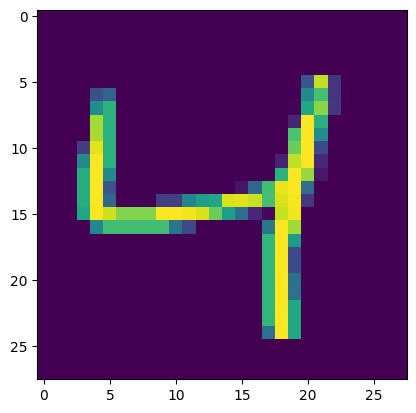

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 3ms/step - loss: 0.2828 - accuracy: 0.9160 - val_loss: 0.1474 - val_accuracy: 0.9571
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1180 - accuracy: 0.9651 - val_loss: 0.1293 - val_accuracy: 0.9598
Epoch 3/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0818 - accuracy: 0.9751 - val_loss: 0.1074 - val_accuracy: 0.9679
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0639 - accuracy: 0.9802 - val_loss: 0.0962 - val_accuracy: 0.9723
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0955 - val_accuracy: 0.9718
Epoch 6/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0974 - val_accuracy: 0.9743
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0984 - val_accuracy

In [12]:
y_prob = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [13]:
y_pred = y_prob.argmax(axis=1)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9781

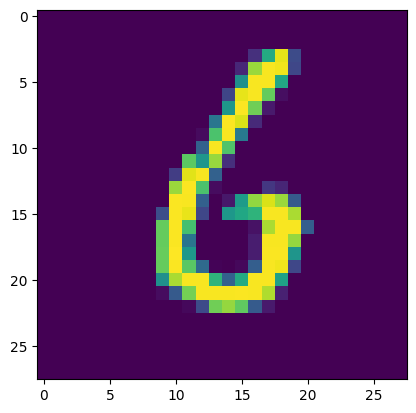

In [17]:
plt.imshow(X_test[50])

In [20]:
model.predict(X_test[50].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 31ms/step


array([6])